# Chapter 5 - Support Vector Machimes

## Exercises
1. What is the fundamental idea behind Support Vector Machines?
   - SVM mencari hyperplane yang optimal untuk memisahkan data dengan margin maksimal antara kelas-kelas yang berbeda.

2. What is a support vector?
   - Support vector adalah titik data yang berada tepat di margin atau melanggar margin. Titik-titik ini menentukan posisi hyperplane.

3. Why is it important to scale the inputs when using SVMs?
   - Scaling penting karena SVM sensitif terhadap skala fitur. Tanpa scaling, fitur dengan skala besar akan mendominasi perhitungan.

4. Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?
   - Ya, SVM dapat menghasilkan confidence score berdasarkan jarak ke hyperplane. Untuk probability, perlu menggunakan calibration.

5. Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?
   - Gunakan primal form karena lebih efisien untuk dataset besar dengan fitur yang relatif sedikit.

6. Say you've trained an SVM classifier with an RBF kernel, but it seems to underfit the training set. Should you increase or decrease γ (gamma)? What about C?
   - Kurangi gamma untuk membuat decision boundary lebih smooth, dan tingkatkan C untuk mengurangi margin.

7. How should you set the QP parameters (H, f, A, and b) to solve the soft margin linear SVM classifier problem using an off-the-shelf QP solver?
   - H adalah kernel matrix, f adalah vektor -1, A adalah matriks constraint, dan b adalah vektor constraint.

In [120]:
import matplotlib.pyplot as plt

In [121]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [123]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

In [124]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

In [125]:
svm_clf.fit(X, y)

,steps,"[('scaler', ...), ('linear_svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001


In [126]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

### Nonlinear SVM Classification

In [127]:
def visualize_svm(svm_clf, X, y, axes=[-1.5, 2.5, -1, 1.5]):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = svm_clf.predict(X_new)
    zz = y_pred.reshape(x0.shape)
    plt.contourf(x0, x1, zz, cmap=plt.cm.brg)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)

In [128]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [129]:
X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])
polynomial_svm_clf.fit(X, y)

c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,steps,"[('poly_features', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


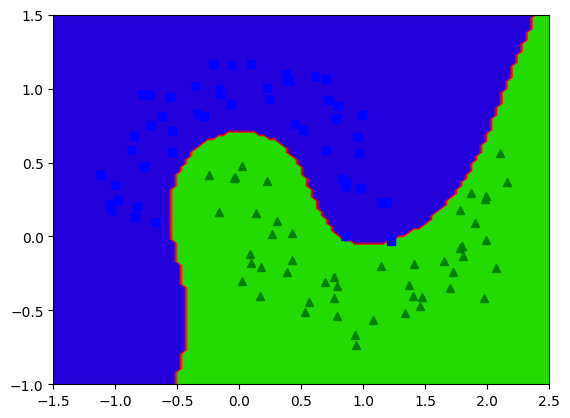

In [130]:
visualize_svm(polynomial_svm_clf, X, y)

### Polynomial Kernel

In [131]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

,steps,"[('scaler', ...), ('svm_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,5
,kernel,'poly'
,degree,3
,gamma,'scale'


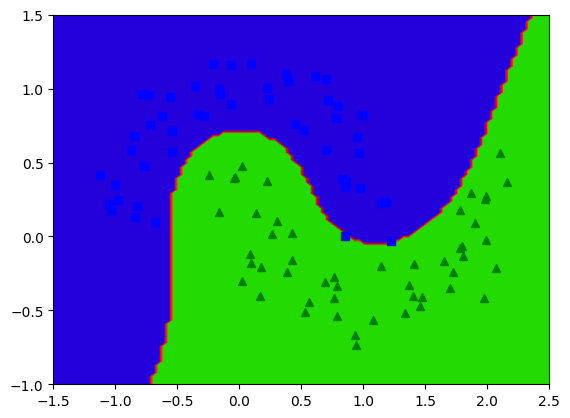

In [132]:
visualize_svm(poly_kernel_svm_clf, X, y)

### Gaussian RBF Kernel

In [133]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

,steps,"[('scaler', ...), ('svm_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,0.001
,kernel,'rbf'
,degree,3
,gamma,5


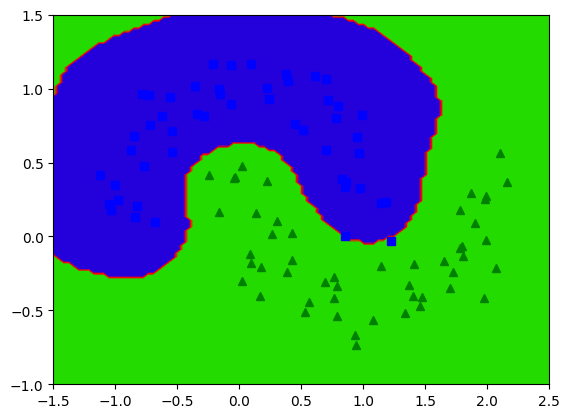

In [134]:
visualize_svm(rbf_kernel_svm_clf, X, y)

### SVM Regression

In [135]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

,epsilon,1.5
,tol,0.0001
,C,1.0
,loss,'epsilon_insensitive'
,fit_intercept,True
,intercept_scaling,1.0
,dual,'auto'
,verbose,0
,random_state,None
,max_iter,1000
